# Preprocessing

In [1]:
#Import Library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
#Import dataset

datapath = '../../../1. Data/Raw/Data Historis ESSA.csv'
dataset = pd.read_csv(datapath)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,01/03/2024,510,520,525,510,"13,12M","-0,97%"
1,29/02/2024,515,500,525,500,"44,35M","0,98%"
2,28/02/2024,510,515,520,500,"30,19M","0,00%"
3,27/02/2024,510,515,520,505,"15,69M","0,00%"
4,26/02/2024,510,530,540,505,"43,97M","-3,77%"
...,...,...,...,...,...,...,...
2179,07/03/2014,1610,1610,1620,1610,"10,20K","0,63%"
2180,06/03/2014,1600,1610,1660,1600,"186,50K","-1,84%"
2181,05/03/2014,1630,1615,1635,1600,"18,90K","1,24%"
2182,04/03/2014,1610,1610,1610,1610,"1,20K","-1,53%"


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     2184 non-null   object
 1   Terakhir    2184 non-null   int64 
 2   Pembukaan   2184 non-null   int64 
 3   Tertinggi   2184 non-null   int64 
 4   Terendah    2184 non-null   int64 
 5   Vol         2184 non-null   object
 6   Perubahan%  2184 non-null   object
dtypes: int64(4), object(3)
memory usage: 119.6+ KB


In [4]:
dataset.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah
count,2184.000000,2184.000000,2184.000000,2184.000000
mean,688.122711,685.886905,702.684524,672.391484
std,777.595470,770.547177,785.318833,761.192034
min,103.000000,103.000000,103.000000,103.000000
25%,216.750000,215.000000,220.000000,211.000000
50%,328.000000,330.000000,340.000000,322.000000
75%,865.000000,865.000000,915.000000,827.500000
max,3550.000000,3595.000000,3600.000000,3500.000000


In [5]:
dataset.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
Tanggal,0
Terakhir,0
Pembukaan,0
Tertinggi,0
Terendah,0
Vol,0
Perubahan%,0


In [6]:
from datetime import datetime
dataset['Tanggal'] = pd.to_datetime(dataset['Tanggal'],
                                   format = '%d/%m/%Y')
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-03-01,510,520,525,510,"13,12M","-0,97%"
1,2024-02-29,515,500,525,500,"44,35M","0,98%"
2,2024-02-28,510,515,520,500,"30,19M","0,00%"
3,2024-02-27,510,515,520,505,"15,69M","0,00%"
4,2024-02-26,510,530,540,505,"43,97M","-3,77%"
...,...,...,...,...,...,...,...
2179,2014-03-07,1610,1610,1620,1610,"10,20K","0,63%"
2180,2014-03-06,1600,1610,1660,1600,"186,50K","-1,84%"
2181,2014-03-05,1630,1615,1635,1600,"18,90K","1,24%"
2182,2014-03-04,1610,1610,1610,1610,"1,20K","-1,53%"


In [7]:
dataset = dataset.sort_values(by='Tanggal',
                              ascending = True,
                              ignore_index = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,1635,1630,1645,1600,"7,20K","-3,25%"
1,2014-03-04,1610,1610,1610,1610,"1,20K","-1,53%"
2,2014-03-05,1630,1615,1635,1600,"18,90K","1,24%"
3,2014-03-06,1600,1610,1660,1600,"186,50K","-1,84%"
4,2014-03-07,1610,1610,1620,1610,"10,20K","0,63%"
...,...,...,...,...,...,...,...
2179,2024-02-26,510,530,540,505,"43,97M","-3,77%"
2180,2024-02-27,510,515,520,505,"15,69M","0,00%"
2181,2024-02-28,510,515,520,500,"30,19M","0,00%"
2182,2024-02-29,515,500,525,500,"44,35M","0,98%"


In [8]:
dataset_B = dataset[dataset['Vol'].str.contains('B')]
print(dataset_B)

Empty DataFrame
Columns: [Tanggal, Terakhir, Pembukaan, Tertinggi, Terendah, Vol, Perubahan%]
Index: []


In [9]:
dataset_M = dataset[dataset['Vol'].str.contains('M')]
print(dataset_M)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah     Vol Perubahan%
26   2014-04-11      1760       1740       1790      1740   1,86M      1,15%
27   2014-04-14      1760       1750       1800      1750   1,60M      0,00%
117  2014-09-04      3485       3240       3500      3240   1,00M      9,25%
171  2014-11-27      3000       2900       3010      2900   1,23M      3,45%
323  2015-12-11       180        180        182       180   1,01M     12,50%
...         ...       ...        ...        ...       ...     ...        ...
2179 2024-02-26       510        530        540       505  43,97M     -3,77%
2180 2024-02-27       510        515        520       505  15,69M      0,00%
2181 2024-02-28       510        515        520       500  30,19M      0,00%
2182 2024-02-29       515        500        525       500  44,35M      0,98%
2183 2024-03-01       510        520        525       510  13,12M     -0,97%

[1517 rows x 7 columns]


In [10]:
dataset_K = dataset[dataset['Vol'].str.contains('K')]
print(dataset_K)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah      Vol Perubahan%
0    2014-03-03      1635       1630       1645      1600    7,20K     -3,25%
1    2014-03-04      1610       1610       1610      1610    1,20K     -1,53%
2    2014-03-05      1630       1615       1635      1600   18,90K      1,24%
3    2014-03-06      1600       1610       1660      1600  186,50K     -1,84%
4    2014-03-07      1610       1610       1620      1610   10,20K      0,63%
...         ...       ...        ...        ...       ...      ...        ...
1316 2020-08-07       155        155        158       155  972,90K      0,00%
1343 2020-09-18       140        138        141       137  807,60K      1,45%
1353 2020-10-02       139        140        141       137  865,50K     -0,71%
1371 2020-11-02       138        139        140       136  701,90K     -0,72%
1374 2020-11-05       139        139        139       137  968,90K      1,46%

[667 rows x 7 columns]


In [11]:
dataset = dataset.replace(to_replace = ',',
                          value = '.',
                          regex = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,1635,1630,1645,1600,7.20K,-3.25%
1,2014-03-04,1610,1610,1610,1610,1.20K,-1.53%
2,2014-03-05,1630,1615,1635,1600,18.90K,1.24%
3,2014-03-06,1600,1610,1660,1600,186.50K,-1.84%
4,2014-03-07,1610,1610,1620,1610,10.20K,0.63%
...,...,...,...,...,...,...,...
2179,2024-02-26,510,530,540,505,43.97M,-3.77%
2180,2024-02-27,510,515,520,505,15.69M,0.00%
2181,2024-02-28,510,515,520,500,30.19M,0.00%
2182,2024-02-29,515,500,525,500,44.35M,0.98%


In [12]:
def replace_value(value):
    if 'K' in value:
        return str(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return str(float(value.replace('M', '')) * 1000000)
    elif 'B' in value:
        return str(float(value.replace('B', '')) * 1000000000)
    return value

dataset['Vol'] = dataset['Vol'].apply(replace_value)

dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,1635,1630,1645,1600,7200.0,-3.25%
1,2014-03-04,1610,1610,1610,1610,1200.0,-1.53%
2,2014-03-05,1630,1615,1635,1600,18900.0,1.24%
3,2014-03-06,1600,1610,1660,1600,186500.0,-1.84%
4,2014-03-07,1610,1610,1620,1610,10200.0,0.63%
...,...,...,...,...,...,...,...
2179,2024-02-26,510,530,540,505,43970000.0,-3.77%
2180,2024-02-27,510,515,520,505,15690000.0,0.00%
2181,2024-02-28,510,515,520,500,30190000.0,0.00%
2182,2024-02-29,515,500,525,500,44350000.0,0.98%


In [13]:
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir               int64
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [14]:
dataset = dataset.astype({'Terakhir': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [15]:
dataset = dataset.astype({'Vol': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                  float32
Perubahan%            object
dtype: object

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2184 non-null   datetime64[ns]
 1   Terakhir    2184 non-null   float32       
 2   Pembukaan   2184 non-null   int64         
 3   Tertinggi   2184 non-null   int64         
 4   Terendah    2184 non-null   int64         
 5   Vol         2184 non-null   float32       
 6   Perubahan%  2184 non-null   object        
dtypes: datetime64[ns](1), float32(2), int64(3), object(1)
memory usage: 102.5+ KB


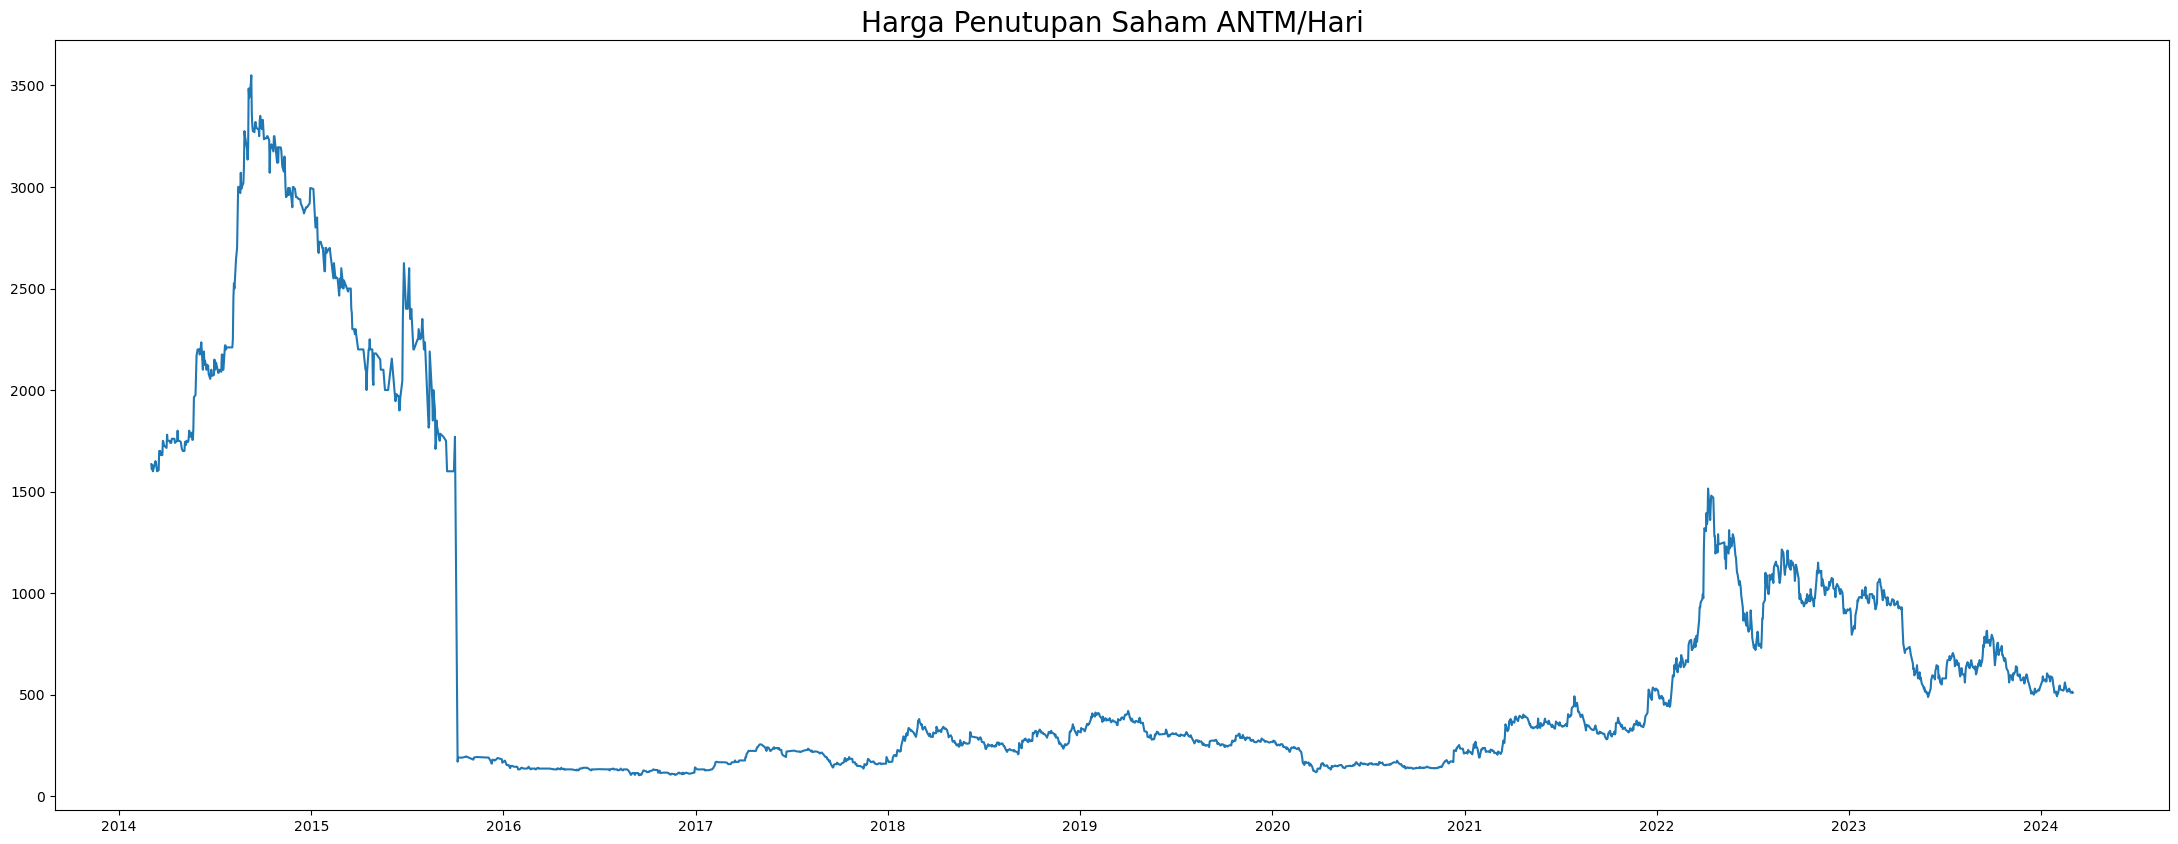

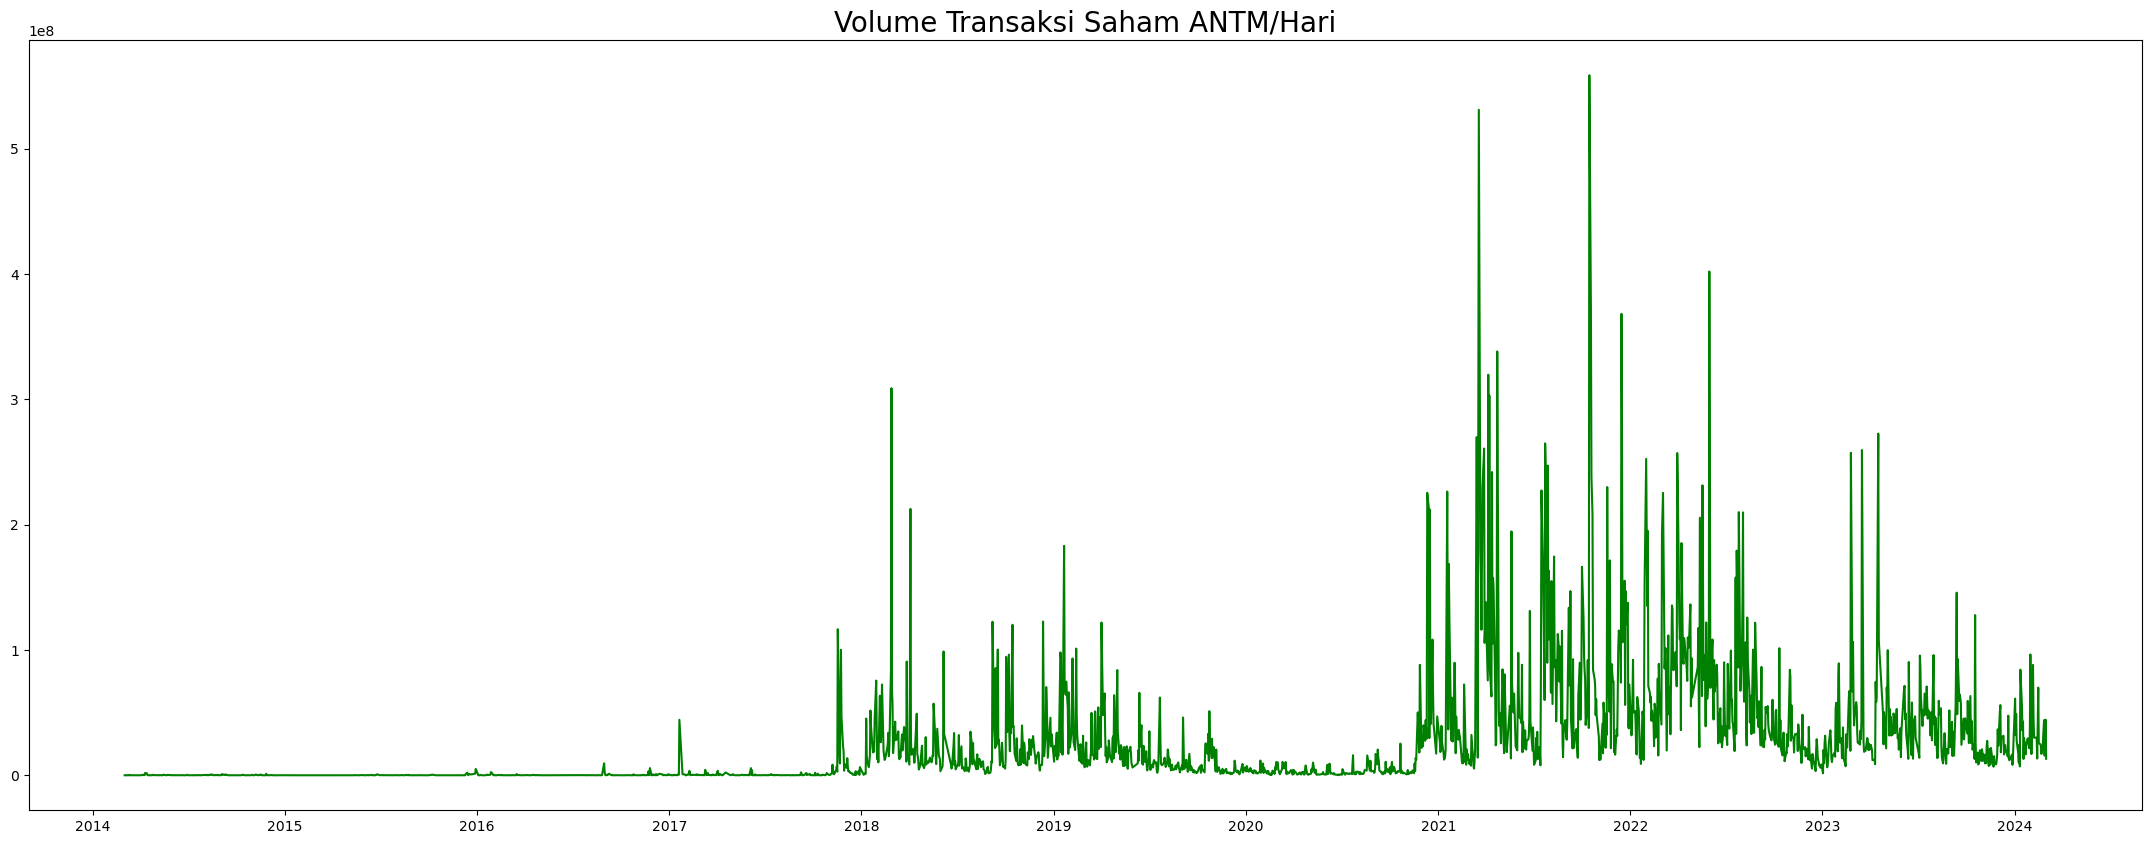

In [17]:
plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Terakhir'])
plt.title('Harga Penutupan Saham ANTM/Hari', fontsize = 20)

plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Vol'], 'g')
plt.title('Volume Transaksi Saham ANTM/Hari', fontsize = 20)

plt.show()

In [18]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu")
print(f"Using {device} device")

Using cuda device


In [19]:
data_use = np.column_stack((dataset['Terakhir'], dataset['Vol']))
tanggal_data = pd.DataFrame({'Tanggal' : dataset['Tanggal']})

print(data_use)
print(tanggal_data)

[[1.635e+03 7.200e+03]
 [1.610e+03 1.200e+03]
 [1.630e+03 1.890e+04]
 ...
 [5.100e+02 3.019e+07]
 [5.150e+02 4.435e+07]
 [5.100e+02 1.312e+07]]
        Tanggal
0    2014-03-03
1    2014-03-04
2    2014-03-05
3    2014-03-06
4    2014-03-07
...         ...
2179 2024-02-26
2180 2024-02-27
2181 2024-02-28
2182 2024-02-29
2183 2024-03-01

[2184 rows x 1 columns]


In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_use)

In [21]:
seq_length = 1

x_train = []
y_train = []

seq_length = 10
for i in range (len(scaled_data) - seq_length):
    x_train.append(scaled_data[i:i + seq_length])
    y_train.append(scaled_data[i + seq_length, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1, 1)

In [22]:
print(x_train)
print(y_train)

[[[4.44444418e-01 1.27114881e-05]
  [4.37191755e-01 1.96938549e-06]
  [4.42993879e-01 3.36585872e-05]
  ...
  [4.40092802e-01 7.16140164e-07]
  [4.34290677e-01 9.93644499e-05]
  [4.35741216e-01 2.34535892e-05]]

 [[4.37191755e-01 1.96938549e-06]
  [4.42993879e-01 3.36585872e-05]
  [4.34290677e-01 3.33721313e-04]
  ...
  [4.34290677e-01 9.93644499e-05]
  [4.35741216e-01 2.34535892e-05]
  [4.63301390e-01 3.49118309e-05]]

 [[4.42993879e-01 3.36585872e-05]
  [4.34290677e-01 3.33721313e-04]
  [4.37191755e-01 1.80825391e-05]
  ...
  [4.35741216e-01 2.34535892e-05]
  [4.63301390e-01 3.49118309e-05]
  [4.63301390e-01 7.10769164e-05]]

 ...

 [[1.22425295e-01 2.38830950e-02]
  [1.32579044e-01 1.25181124e-01]
  [1.28227443e-01 4.64057028e-02]
  ...
  [1.23875834e-01 3.66482958e-02]
  [1.18073680e-01 7.87215307e-02]
  [1.18073680e-01 2.80904192e-02]]

 [[1.32579044e-01 1.25181124e-01]
  [1.28227443e-01 4.64057028e-02]
  [1.19524218e-01 4.40782495e-02]
  ...
  [1.18073680e-01 7.87215307e-02]
  [1

In [23]:
train_size = int(len(x_train) * 0.8)
x_train, x_test = x_train[:train_size], x_train[train_size:]
y_train, y_test = y_train[:train_size], y_train[train_size:]
tanggal_train, tanggal_test = tanggal_data[seq_length:train_size+seq_length],tanggal_data[train_size+seq_length:]

print(x_train.shape)
print(y_train.shape)
print(tanggal_train.shape)
print(y_test.shape)
print(tanggal_test.shape)

print(tanggal_test)

(1739, 10, 2)
(1739, 1)
(1739, 1)
(435, 1)
(435, 1)
        Tanggal
1749 2022-05-25
1750 2022-05-27
1751 2022-05-30
1752 2022-05-31
1753 2022-06-02
...         ...
2179 2024-02-26
2180 2024-02-27
2181 2024-02-28
2182 2024-02-29
2183 2024-03-01

[435 rows x 1 columns]


In [24]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [25]:
# Memastikan bentuk data benar
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)

# Menampilkan contoh data dari x_train_tensor dan y_train_tensor
print("\nContoh data dari x_train_tensor:")
print(x_train_tensor[0])  # Menampilkan sampel pertama dari x_train_tensor

print("\nContoh data dari y_train_tensor:")
print(y_train_tensor[0])  # Menampilkan target pertama dari y_train_tensor

x_train_tensor shape: torch.Size([1739, 10, 2])
y_train_tensor shape: torch.Size([1739, 1])
x_test_tensor shape: torch.Size([435, 10, 2])
y_test_tensor shape: torch.Size([435, 1])

Contoh data dari x_train_tensor:
tensor([[4.4444e-01, 1.2711e-05],
        [4.3719e-01, 1.9694e-06],
        [4.4299e-01, 3.3659e-05],
        [4.3429e-01, 3.3372e-04],
        [4.3719e-01, 1.8083e-05],
        [4.4880e-01, 5.5501e-06],
        [4.4589e-01, 6.7478e-04],
        [4.4009e-01, 7.1614e-07],
        [4.3429e-01, 9.9364e-05],
        [4.3574e-01, 2.3454e-05]])

Contoh data dari y_train_tensor:
tensor([0.4633])


In [26]:
class StockPricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockPricePredictor, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.gru1 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.gru2 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        h0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm1(x, (h0_lstm1, c0_lstm1))
        
        h0_gru1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru1(out, h0_gru1)
        
        h0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm2(out, (h0_lstm2, c0_lstm2))
        
        h0_gru2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru2(out, h0_gru2)
        
        out = self.fc(out[:, -1, :])
        return out

In [27]:
# Membuat TensorDataset dan DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [28]:
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)


x_train_tensor shape: torch.Size([1739, 10, 2])
y_train_tensor shape: torch.Size([1739, 1])
x_test_tensor shape: torch.Size([435, 10, 2])
y_test_tensor shape: torch.Size([435, 1])


In [29]:
input_size = x_train_tensor.shape[2]  # number of features, in this case 2
hidden_size = 64
num_layers = 1
num_epochs = 40
learning_rate = 0.001

# Initialize model, loss function, optimizer
model = StockPricePredictor(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # Average training loss for this epoch
    train_losses.append(epoch_train_loss / len(train_loader))
    
    # Validation loss
    model.eval()
    epoch_val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_targets in test_loader:
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_targets)
            epoch_val_loss += val_loss.item()
    
    # Average validation loss for this epoch
    val_losses.append(epoch_val_loss / len(test_loader))
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')


Epoch [1/40], Loss: 0.0005
Epoch [1/40], Training Loss: 0.0280, Validation Loss: 0.0004
Epoch [2/40], Loss: 0.0146
Epoch [2/40], Training Loss: 0.0016, Validation Loss: 0.0030
Epoch [3/40], Loss: 0.0006
Epoch [3/40], Training Loss: 0.0016, Validation Loss: 0.0005
Epoch [4/40], Loss: 0.0001
Epoch [4/40], Training Loss: 0.0011, Validation Loss: 0.0006
Epoch [5/40], Loss: 0.0001
Epoch [5/40], Training Loss: 0.0011, Validation Loss: 0.0004
Epoch [6/40], Loss: 0.0005
Epoch [6/40], Training Loss: 0.0010, Validation Loss: 0.0007
Epoch [7/40], Loss: 0.0004
Epoch [7/40], Training Loss: 0.0011, Validation Loss: 0.0020
Epoch [8/40], Loss: 0.0004
Epoch [8/40], Training Loss: 0.0011, Validation Loss: 0.0004
Epoch [9/40], Loss: 0.0004
Epoch [9/40], Training Loss: 0.0010, Validation Loss: 0.0009
Epoch [10/40], Loss: 0.0002
Epoch [10/40], Training Loss: 0.0009, Validation Loss: 0.0004
Epoch [11/40], Loss: 0.0003
Epoch [11/40], Training Loss: 0.0009, Validation Loss: 0.0005
Epoch [12/40], Loss: 0.0004


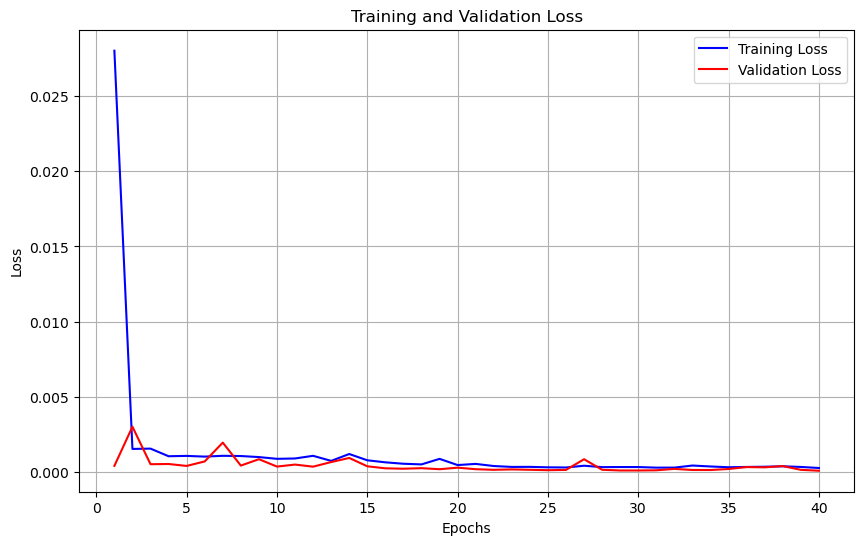

In [30]:
# Visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Evaluation
model.eval()
with torch.no_grad():
    test_loss = 0
    predictions = []
    actuals = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(targets.cpu().numpy())

test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0001


In [32]:
# Convert predictions and actuals to numpy arrays
predictions = np.array(predictions)
actuals = np.array(actuals)

In [33]:
# Predictions
model.eval()
with torch.no_grad():
    predictions = []
    for inputs, _ in test_loader:
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy())

predictions = np.array(predictions)
print(predictions[:10])  # Menampilkan 10 prediksi pertama

[[0.33593622]
 [0.35326147]
 [0.345855  ]
 [0.3283605 ]
 [0.34276265]
 [0.2954659 ]
 [0.28979608]
 [0.28110516]
 [0.2783885 ]
 [0.27473643]]


In [34]:
# Membuat DataFrame untuk perbandingan hasil prediksi dan nilai aktual
comparison_df = pd.DataFrame({
    'Predicted': predictions.flatten(),
    'Actual': actuals.flatten()
})

# Menampilkan DataFrame
print(comparison_df)

     Predicted    Actual
0     0.335936  0.344357
1     0.353261  0.338555
2     0.345855  0.313896
3     0.328360  0.310995
4     0.342763  0.289237
..         ...       ...
430   0.120465  0.118074
431   0.120636  0.118074
432   0.118351  0.118074
433   0.117632  0.119524
434   0.118851  0.118074

[435 rows x 2 columns]


In [35]:
# Menghitung metrik
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actuals, predictions)

# Menampilkan hasil
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")

MSE: 0.0001
RMSE: 0.0105
MAPE: 3.8311%


In [36]:
# Membuat Data Frame
train_df = pd.DataFrame({
    'Tanggal': tanggal_train['Tanggal'],
    'Value': y_train.flatten(),
    'Type': 'Train'
})

test_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': y_test.flatten(),
    'Type': 'Test'
})

predicted_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': predictions.flatten(),
    'Type': 'Predicted'
})

In [37]:
compact_df = pd.concat([test_df, predicted_df])

In [38]:
# Menggabungkan DataFrame
combined_df = pd.concat([train_df, test_df, predicted_df])

# Menampilkan DataFrame
print(combined_df)

        Tanggal     Value       Type
10   2014-03-18  0.463301      Train
11   2014-03-19  0.463301      Train
12   2014-03-20  0.463301      Train
13   2014-03-21  0.457499      Train
14   2014-03-24  0.457499      Train
...         ...       ...        ...
2179 2024-02-26  0.120465  Predicted
2180 2024-02-27  0.120636  Predicted
2181 2024-02-28  0.118351  Predicted
2182 2024-02-29  0.117632  Predicted
2183 2024-03-01  0.118851  Predicted

[2609 rows x 3 columns]


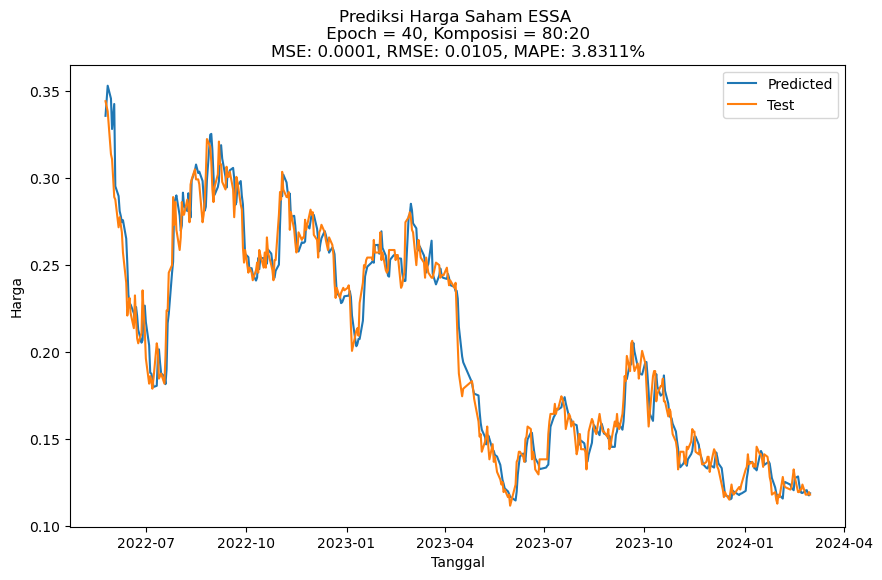

In [39]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in compact_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham ESSA \n 'f"Epoch = {num_epochs}"', Komposisi = 80:20 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

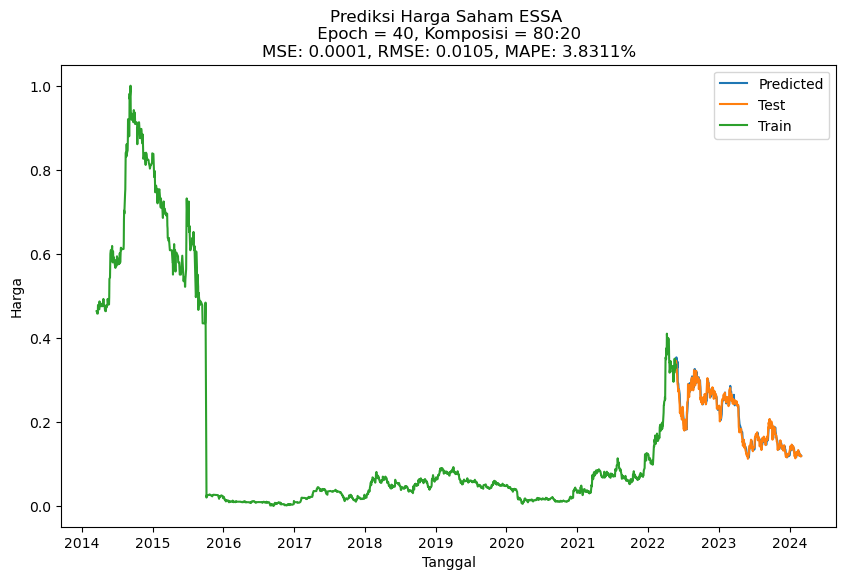

In [40]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in combined_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham ESSA \n 'f"Epoch = {num_epochs}"', Komposisi = 80:20 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Prediksi 1 Bulan 

In [41]:
#Import dataset

datapath_new = 'data/Data Historis ESSA 1 Bulan.csv'
dataset_new = pd.read_csv(datapath_new)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,07/06/2024,715,725,730,705,"19,89M","-0,69%"
1,06/06/2024,720,725,750,675,"77,77M","0,70%"
2,05/06/2024,715,795,800,705,"45,31M","-10,63%"
3,04/06/2024,800,795,820,780,"20,87M","1,27%"
4,03/06/2024,790,780,800,765,"15,41M","2,60%"
5,31/05/2024,770,820,825,770,"56,95M","-5,52%"
6,30/05/2024,815,810,820,780,"45,84M","1,24%"
7,29/05/2024,805,815,815,800,"21,66M","0,00%"
8,28/05/2024,805,775,815,775,"21,05M","3,87%"
9,27/05/2024,775,810,815,765,"43,16M","-4,91%"


In [42]:
dataset_new['Tanggal'] = pd.to_datetime(dataset_new['Tanggal'],
                                   format = '%d/%m/%Y')
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-06-07,715,725,730,705,"19,89M","-0,69%"
1,2024-06-06,720,725,750,675,"77,77M","0,70%"
2,2024-06-05,715,795,800,705,"45,31M","-10,63%"
3,2024-06-04,800,795,820,780,"20,87M","1,27%"
4,2024-06-03,790,780,800,765,"15,41M","2,60%"
5,2024-05-31,770,820,825,770,"56,95M","-5,52%"
6,2024-05-30,815,810,820,780,"45,84M","1,24%"
7,2024-05-29,805,815,815,800,"21,66M","0,00%"
8,2024-05-28,805,775,815,775,"21,05M","3,87%"
9,2024-05-27,775,810,815,765,"43,16M","-4,91%"


In [43]:
dataset_new = dataset_new.sort_values(by='Tanggal',
                              ascending = True,
                              ignore_index = True)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,750,710,760,705,"42,51M","4,17%"
1,2024-04-17,725,760,760,715,"25,63M","-3,33%"
2,2024-04-18,750,725,760,710,"29,65M","3,45%"
3,2024-04-19,750,750,755,730,"37,96M","0,00%"
4,2024-04-22,745,750,760,740,"17,04M","-0,67%"
5,2024-04-23,730,755,760,720,"30,04M","-2,01%"
6,2024-04-24,750,735,755,715,"49,33M","2,74%"
7,2024-04-25,775,755,795,745,"60,37M","3,33%"
8,2024-04-26,775,775,790,745,"37,02M","0,00%"
9,2024-04-29,785,775,790,755,"28,78M","1,29%"


In [44]:
dataset_new = dataset_new.replace(to_replace = ',',
                          value = '.',
                          regex = True)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,750,710,760,705,42.51M,4.17%
1,2024-04-17,725,760,760,715,25.63M,-3.33%
2,2024-04-18,750,725,760,710,29.65M,3.45%
3,2024-04-19,750,750,755,730,37.96M,0.00%
4,2024-04-22,745,750,760,740,17.04M,-0.67%
5,2024-04-23,730,755,760,720,30.04M,-2.01%
6,2024-04-24,750,735,755,715,49.33M,2.74%
7,2024-04-25,775,755,795,745,60.37M,3.33%
8,2024-04-26,775,775,790,745,37.02M,0.00%
9,2024-04-29,785,775,790,755,28.78M,1.29%


In [45]:
def replace_value(value):
    if 'K' in value:
        return str(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return str(float(value.replace('M', '')) * 1000000)
    elif 'B' in value:
        return str(float(value.replace('B', '')) * 1000000000)
    return value

dataset_new['Vol'] = dataset_new['Vol'].apply(replace_value)

dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,750,710,760,705,42510000.0,4.17%
1,2024-04-17,725,760,760,715,25630000.0,-3.33%
2,2024-04-18,750,725,760,710,29650000.0,3.45%
3,2024-04-19,750,750,755,730,37960000.0,0.00%
4,2024-04-22,745,750,760,740,17040000.0,-0.67%
5,2024-04-23,730,755,760,720,30040000.0,-2.01%
6,2024-04-24,750,735,755,715,49330000.0,2.74%
7,2024-04-25,775,755,795,745,60370000.0,3.33%
8,2024-04-26,775,775,790,745,37020000.0,0.00%
9,2024-04-29,785,775,790,755,28780000.0,1.29%


In [46]:
dataset_new = dataset_new.astype({'Terakhir': 'float32'})
dataset_new.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [47]:
dataset_new = dataset_new.astype({'Vol': 'float32'})
dataset_new.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                  float32
Perubahan%            object
dtype: object

In [48]:
data_use_new = np.column_stack((dataset_new['Terakhir'], dataset_new['Vol']))
tanggal_data_new = pd.DataFrame({'Tanggal' : dataset_new['Tanggal']})

print(data_use_new)
print(tanggal_data_new)

[[7.500e+02 4.251e+07]
 [7.250e+02 2.563e+07]
 [7.500e+02 2.965e+07]
 [7.500e+02 3.796e+07]
 [7.450e+02 1.704e+07]
 [7.300e+02 3.004e+07]
 [7.500e+02 4.933e+07]
 [7.750e+02 6.037e+07]
 [7.750e+02 3.702e+07]
 [7.850e+02 2.878e+07]
 [7.800e+02 2.569e+07]
 [7.450e+02 2.370e+07]
 [7.800e+02 3.342e+07]
 [7.850e+02 1.899e+07]
 [8.300e+02 6.628e+07]
 [8.200e+02 4.447e+07]
 [8.000e+02 4.632e+07]
 [7.850e+02 2.923e+07]
 [7.850e+02 2.840e+07]
 [8.100e+02 3.707e+07]
 [8.150e+02 3.717e+07]
 [8.350e+02 6.626e+07]
 [8.350e+02 3.501e+07]
 [8.150e+02 2.213e+07]
 [7.750e+02 4.316e+07]
 [8.050e+02 2.105e+07]
 [8.050e+02 2.166e+07]
 [8.150e+02 4.584e+07]
 [7.700e+02 5.695e+07]
 [7.900e+02 1.541e+07]
 [8.000e+02 2.087e+07]
 [7.150e+02 4.531e+07]
 [7.200e+02 7.777e+07]
 [7.150e+02 1.989e+07]]
      Tanggal
0  2024-04-16
1  2024-04-17
2  2024-04-18
3  2024-04-19
4  2024-04-22
5  2024-04-23
6  2024-04-24
7  2024-04-25
8  2024-04-26
9  2024-04-29
10 2024-04-30
11 2024-05-02
12 2024-05-03
13 2024-05-06
14 2024

In [49]:
scaled_data_new = scaler.fit_transform(data_use_new)

In [50]:
harga_new = scaled_data_new[:, 0]
volume_new = scaled_data_new[:, 1]
print(harga_new)
print(volume_new)

[0.29166698 0.08333349 0.29166698 0.29166698 0.25       0.125
 0.29166698 0.5        0.5        0.5833335  0.541667   0.25
 0.541667   0.5833335  0.9583335  0.875      0.7083335  0.5833335
 0.5833335  0.791667   0.8333335  1.         1.         0.8333335
 0.5        0.75       0.75       0.8333335  0.4583335  0.625
 0.7083335  0.         0.04166698 0.        ]
[0.43457347 0.16388713 0.22835152 0.36161005 0.02613856 0.23460554
 0.54393846 0.72097504 0.34653628 0.21440028 0.16484927 0.13293777
 0.28880697 0.05740859 0.8157473  0.4660039  0.49567032 0.22161643
 0.20830663 0.34733808 0.34894168 0.81542665 0.31430405 0.1077614
 0.44499683 0.09044258 0.10022451 0.4879731  0.66613215 0.
 0.08755614 0.47947407 1.         0.07184093]


In [51]:
seq_length = 10  # Panjang urutan yang digunakan untuk pelatihan
predict_length = 20 # Prediksi 1 minggu ke depan (5 hari perdagangan)

x_new = []

for i in range(len(scaled_data_new) - seq_length):
    x_new.append(scaled_data_new[i:i + seq_length])

x_new = np.array(x_new)

# Convert to PyTorch tensors
x_new_tensor = torch.tensor(x_new, dtype=torch.float32)

In [52]:
model.eval()
with torch.no_grad():
    predictions_new = model(x_new_tensor)

# Konversi prediksi dari tensor ke numpy array
predictions_new = predictions_new.numpy()

In [53]:
# Ambil hanya kolom harga dari prediksi (kolom pertama)
predicted_prices_new = scaler.inverse_transform(
    np.concatenate([predictions_new, np.zeros((predictions_new.shape[0], 1))], axis=1)
)[:, 0]

In [54]:
df_new = pd.DataFrame(dataset_new, columns=['Tanggal', 'Terakhir', 'Vol'])
df_new

,Tanggal,Terakhir,Vol
0,2024-04-16,750.0,42510000.0
1,2024-04-17,725.0,25630000.0
2,2024-04-18,750.0,29650000.0
3,2024-04-19,750.0,37960000.0
4,2024-04-22,745.0,17040000.0
5,2024-04-23,730.0,30040000.0
6,2024-04-24,750.0,49330000.0
7,2024-04-25,775.0,60370000.0
8,2024-04-26,775.0,37020000.0
9,2024-04-29,785.0,28780000.0


In [55]:
# Buat DataFrame untuk prediksi dimulai dari tanggal 10
# Ambil tanggal terakhir dari data asli
last_date = pd.to_datetime(df_new['Tanggal'].iloc[-1])

# Tentukan tanggal mulai prediksi
start_date = last_date + pd.Timedelta(days=3)  # Dari tanggal 7 ke tanggal 10

# Buat range tanggal untuk prediksi
pred_dates = pd.date_range(start=start_date, periods=predict_length)

In [56]:
# Buat DataFrame untuk prediksi
pred_df = pd.DataFrame({'Tanggal': pred_dates, 'Harga_Terprediksi': predicted_prices_new[-predict_length:]})

# Gabungkan dengan DataFrame asli
result_df_new = pd.concat([df_new, pred_df[['Tanggal', 'Harga_Terprediksi']]], axis=0)

In [57]:
# Gabungkan dengan DataFrame asli
result_df_new = pd.concat([df_new, pred_df[['Tanggal', 'Harga_Terprediksi']]], axis=0)

print(result_df_new)

      Tanggal  Terakhir         Vol  Harga_Terprediksi
0  2024-04-16     750.0  42510000.0                NaN
1  2024-04-17     725.0  25630000.0                NaN
2  2024-04-18     750.0  29650000.0                NaN
3  2024-04-19     750.0  37960000.0                NaN
4  2024-04-22     745.0  17040000.0                NaN
5  2024-04-23     730.0  30040000.0                NaN
6  2024-04-24     750.0  49330000.0                NaN
7  2024-04-25     775.0  60370000.0                NaN
8  2024-04-26     775.0  37020000.0                NaN
9  2024-04-29     785.0  28780000.0                NaN
10 2024-04-30     780.0  25690000.0                NaN
11 2024-05-02     745.0  23700000.0                NaN
12 2024-05-03     780.0  33420000.0                NaN
13 2024-05-06     785.0  18990000.0                NaN
14 2024-05-07     830.0  66280000.0                NaN
15 2024-05-08     820.0  44470000.0                NaN
16 2024-05-13     800.0  46320000.0                NaN
17 2024-05

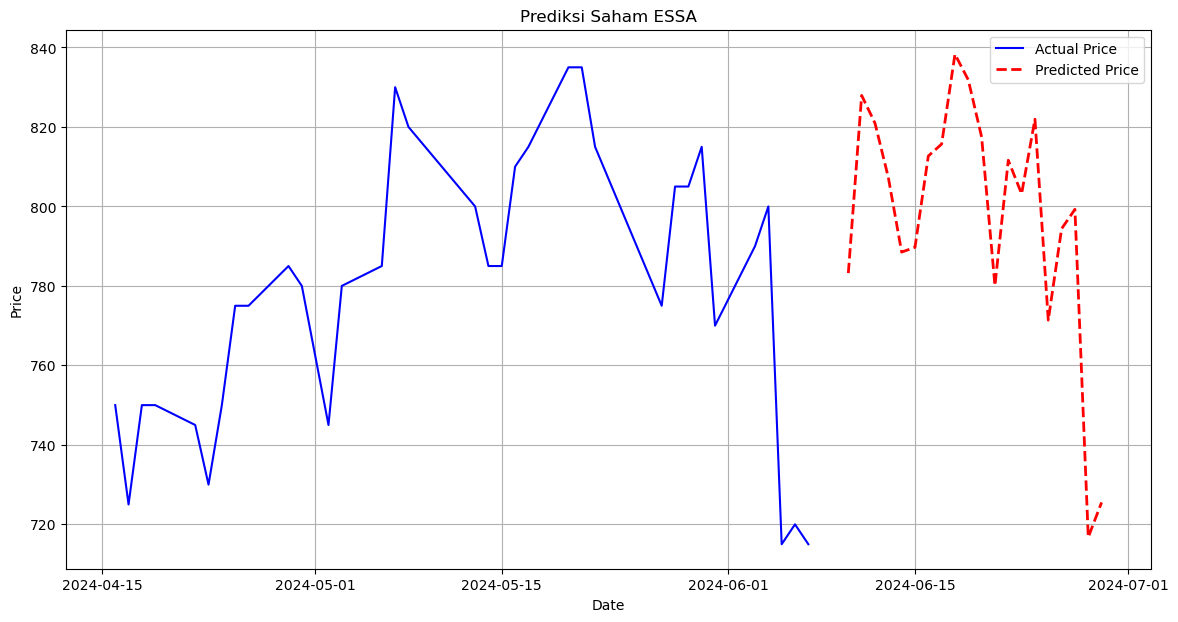

In [60]:
# Plotting
plt.figure(figsize=(14, 7))

# Plot data asli
plt.plot(result_df_new['Tanggal'][:len(df_new)], df_new['Terakhir'], label='Actual Price', color='blue')

# Plot data prediksi
plt.plot(pred_df['Tanggal'], pred_df['Harga_Terprediksi'], label='Predicted Price', color='red', linestyle='--', linewidth=2)

# Konfigurasi grafik
plt.title('Prediksi Saham ESSA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

In [59]:
result_df_new.to_csv('Harga Terprediksi ESSA.csv', index=False)